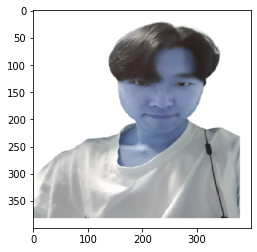

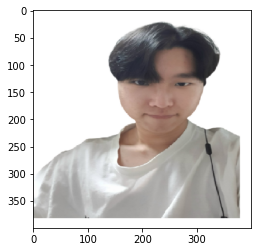

rectangles[[(182, 96) (311, 225)]]


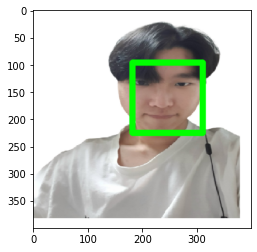

68


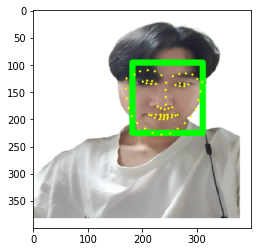

(243, 173)
(x,y) : (243,108)
(w,h) : (130,130)
(130, 130, 3)
(x,y) : (178,102)
(130, 130, 3)
(x,y) : (178,102)
130
308


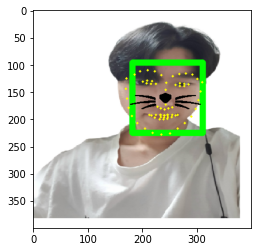

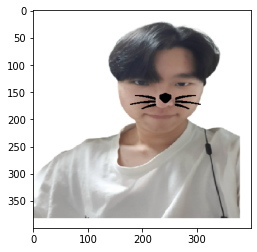

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image1.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (400, 400))    
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()  # 흑백 출력

# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # opencv 컬러로 변환
plt.imshow(img_rgb)
plt.show()


import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 (sliding window로 얼굴 위치 찾는 함수)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)  바운딩 박스 추출

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:  # tuple (x, y) 68개로 이루어진 리스트를 생성
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts())) 
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)  # 기준선 출력
plt.imshow(img_show_rgb)
plt.show()

x = 0  
y = 0
w = 0
h = 0

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):     # 코의 중심점 좌표
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))


import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'  # 야옹이 수염 계산한 크기 resize
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x    - w // 2  # left
refined_y = y    - int(h * 0.05)   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  # 음수는 이미지 범위 밖에 위치라 출력이 되었네요

   
print (img_sticker.shape)

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:] # y 크기만큼 스티커 crop
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))  # 원본 이미지에 스티커 적용

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] 
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
print(img_sticker.shape[0])
print(refined_x+img_sticker.shape[1])

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker!=0).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))   # 결과 출력
plt.show()

sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]  
# bounding box와 landmark를 제거
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker!=0).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()